About Dataset
Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.

Problem-----
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.



In [ ]:
# Import Required Packages

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [13]:
# Data collection and processing

In [111]:
loan_df=pd.read_csv("loan_prediction.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [112]:
loan_df.shape

(614, 13)

In [113]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [114]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [115]:
# Missing values in columns
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [116]:
columans=loan_df.columns

In [117]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [118]:
cat_col=loan_df.columns[loan_df.dtypes=="object"]
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [119]:
num_col=loan_df.columns[(loan_df.dtypes=="int64") |(loan_df.dtypes=="float64") ]
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [120]:
# Missing Values

In [121]:
import missingno as msn

<AxesSubplot:>

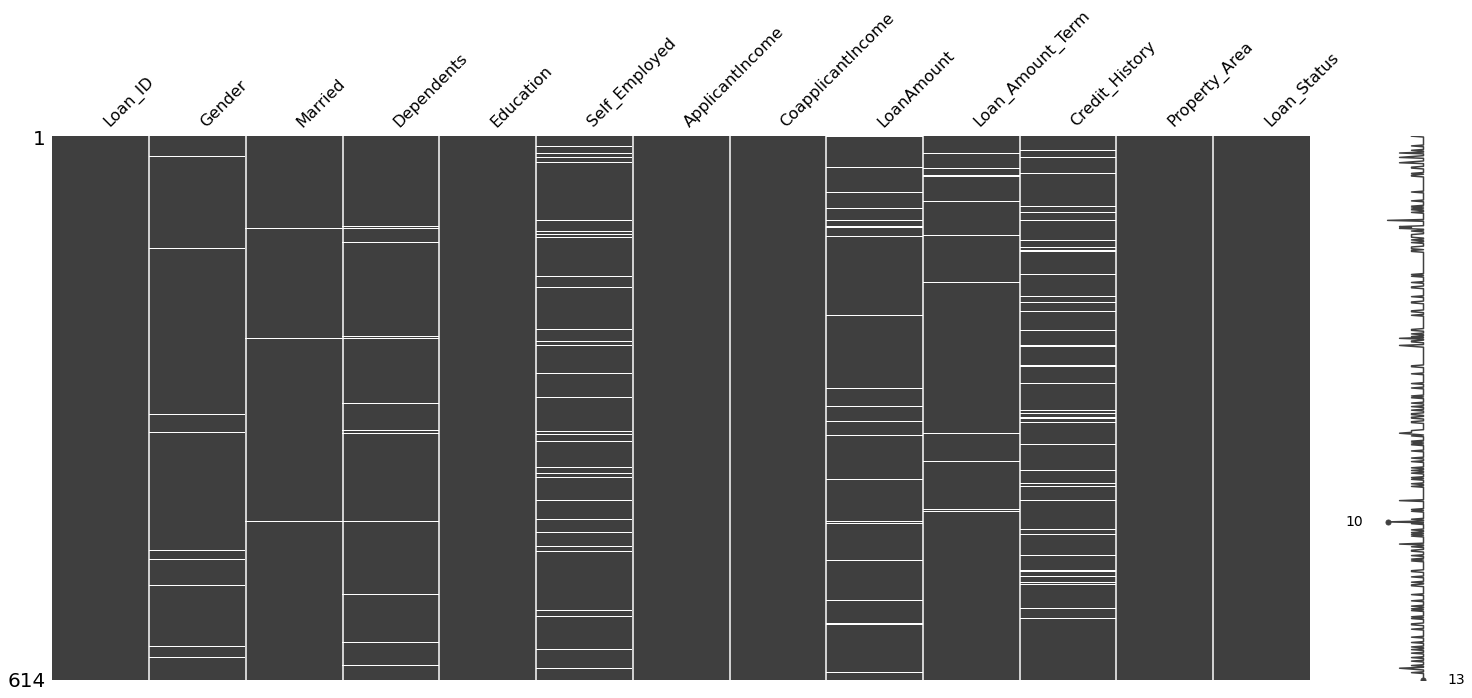

In [122]:
msn.matrix(loan_df)

<AxesSubplot:>

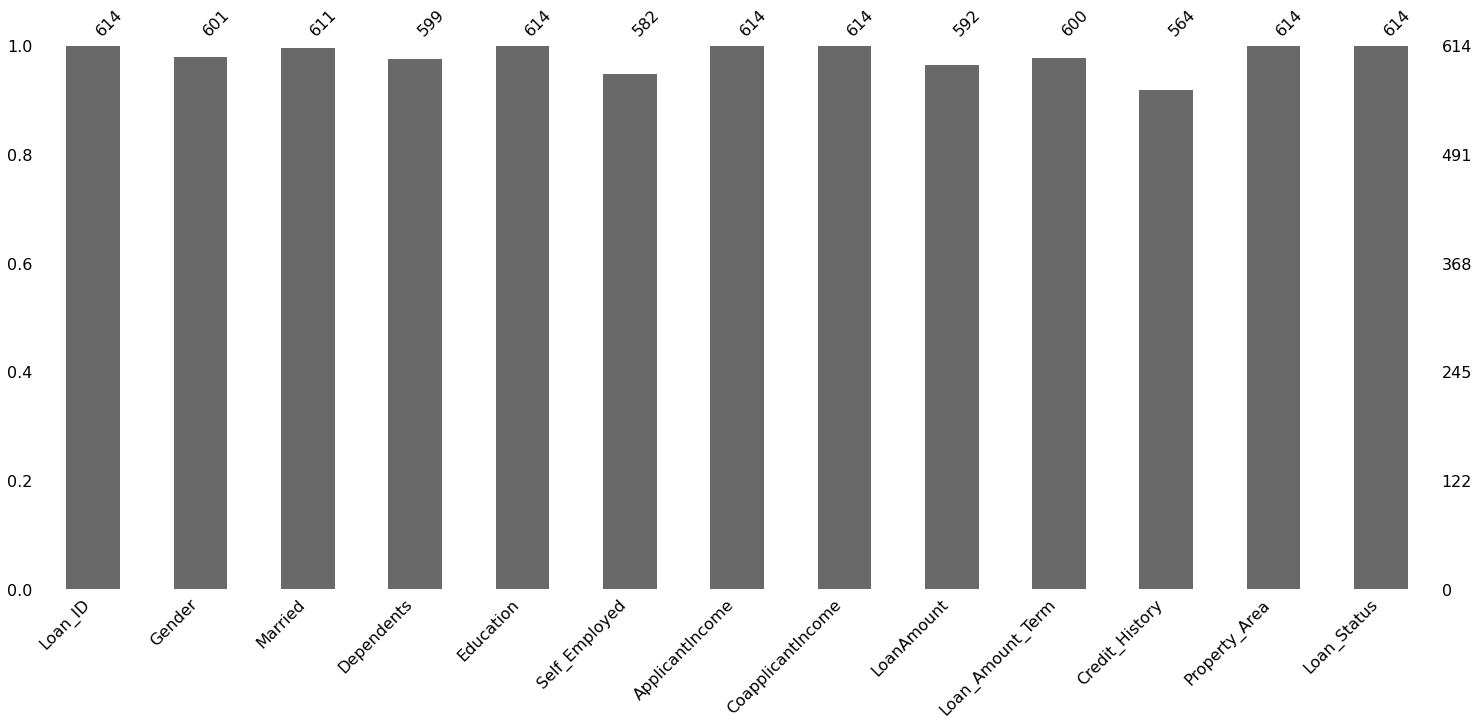

In [123]:
msn.bar(loan_df)

In [124]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

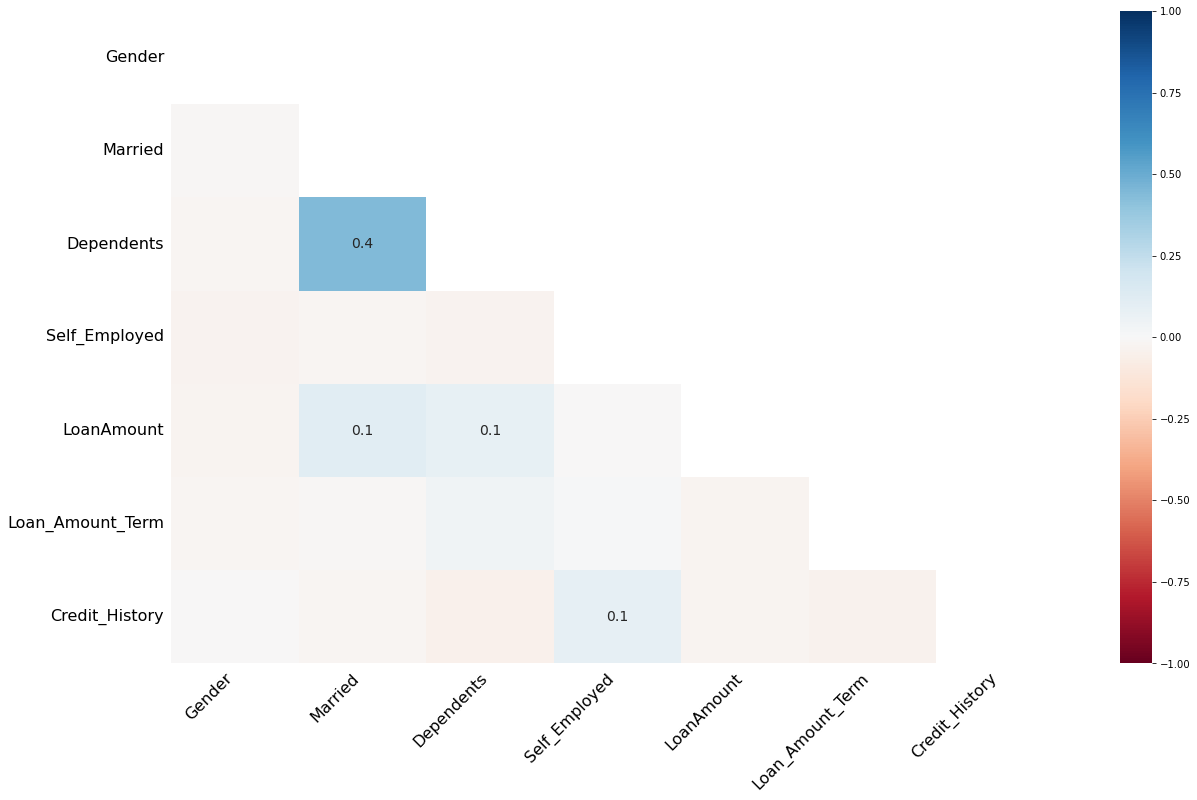

In [125]:
msn.heatmap(loan_df)

In [126]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [127]:
# Droping missing values
loan_df.dropna(how="any",inplace=True)

In [128]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

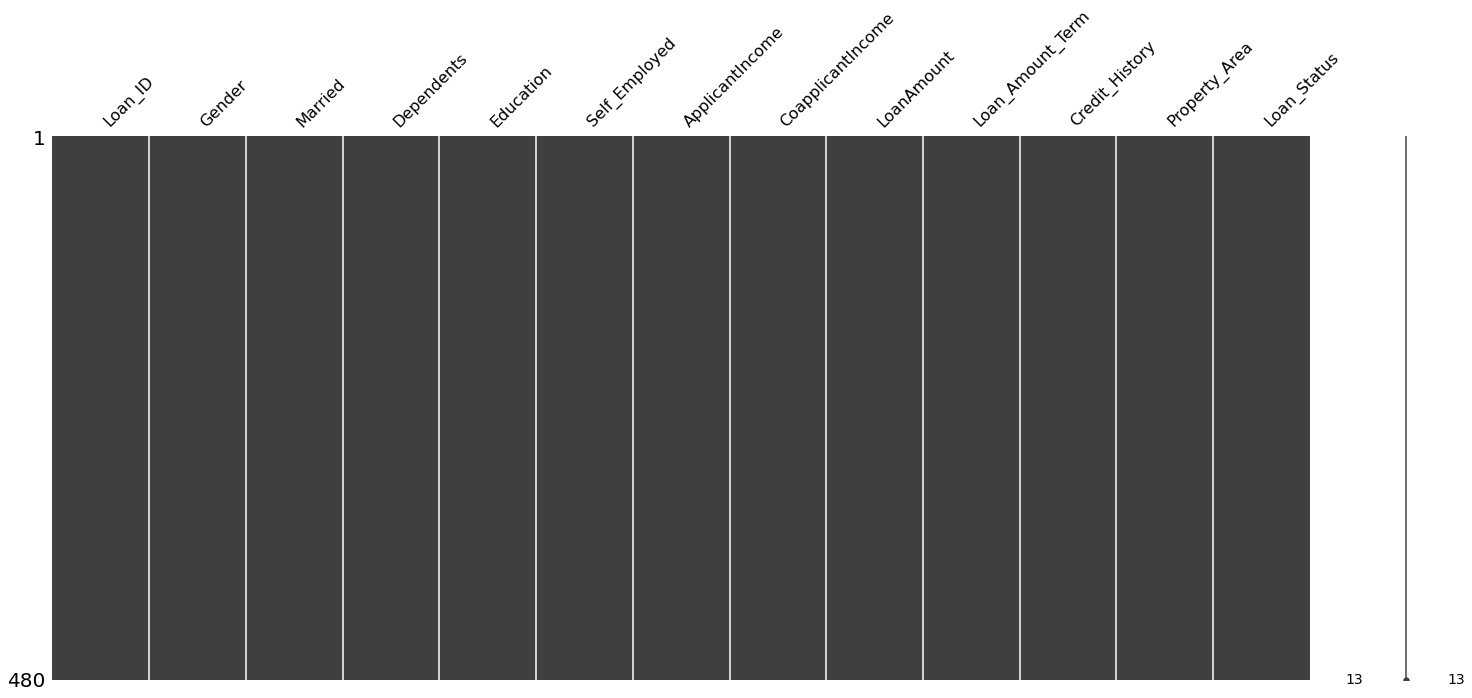

In [129]:
msn.matrix(loan_df)

<AxesSubplot:>

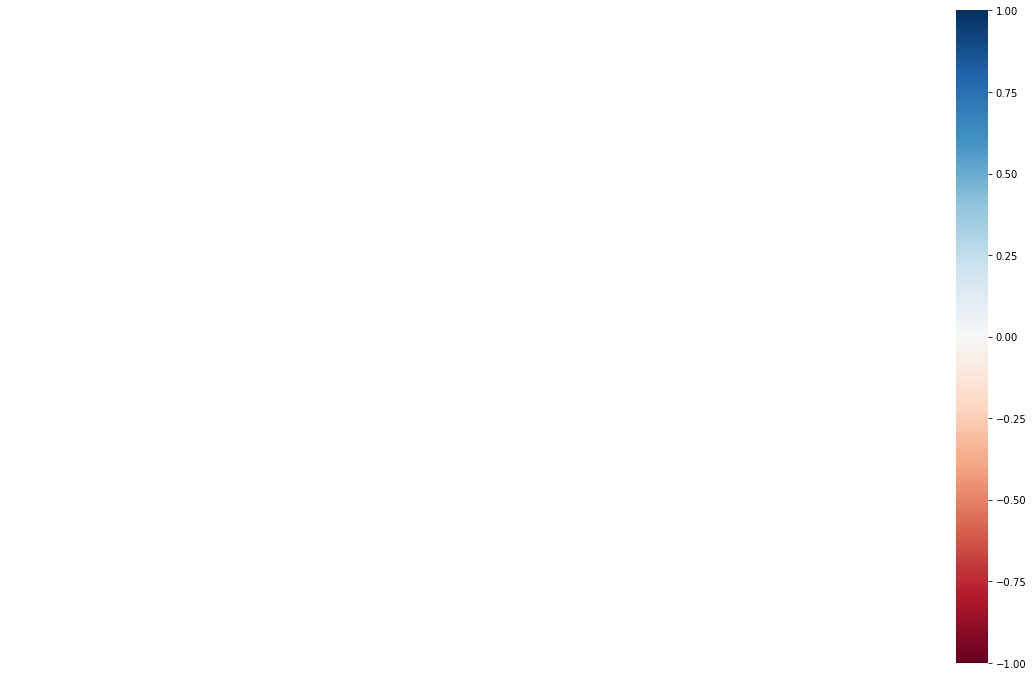

In [130]:
msn.heatmap(loan_df)

In [131]:
# correlation
loan_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


<AxesSubplot:>

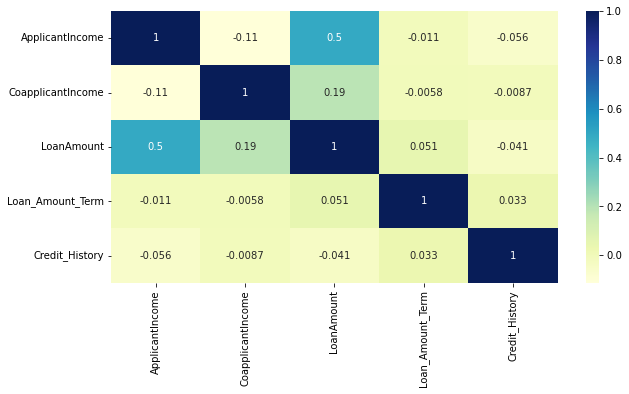

In [132]:
plt.figure(figsize=(10,5))
sns.heatmap(loan_df.corr(),annot=True,cmap='YlGnBu')

In [133]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [134]:
# count plot

<AxesSubplot:xlabel='Gender', ylabel='count'>

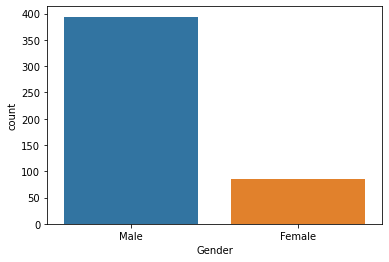

In [135]:
sns.countplot(loan_df["Gender"])

<AxesSubplot:xlabel='Married', ylabel='count'>

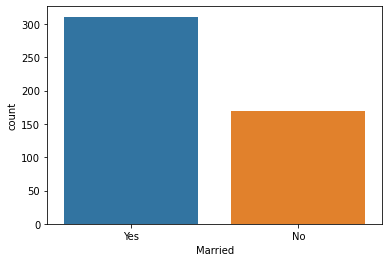

In [136]:
sns.countplot(loan_df["Married"])

<AxesSubplot:xlabel='Education', ylabel='count'>

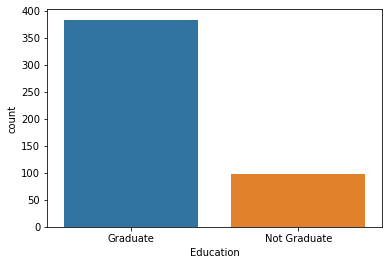

In [137]:
sns.countplot(loan_df["Education"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

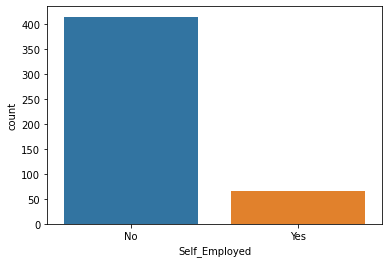

In [138]:
sns.countplot(loan_df["Self_Employed"])

In [ ]:
# Bar plot

<AxesSubplot:>

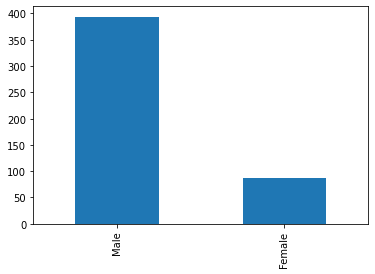

In [140]:
loan_df["Gender"].value_counts().plot(kind="bar")

<AxesSubplot:>

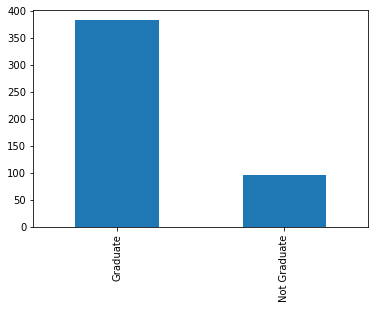

In [141]:
loan_df["Education"].value_counts().plot(kind="bar")

In [142]:
# Pie chart

<AxesSubplot:ylabel='Gender'>

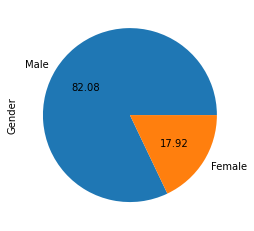

In [143]:
loan_df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='Education'>

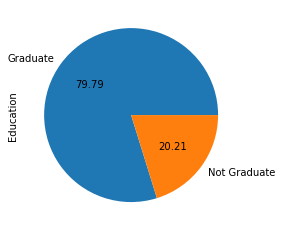

In [144]:
loan_df["Education"].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='Self_Employed'>

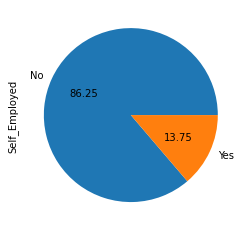

In [145]:
loan_df["Self_Employed"].value_counts().plot(kind="pie",autopct="%.2f")

In [146]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [147]:
#histogram

(array([412.,  53.,  10.,   0.,   4.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

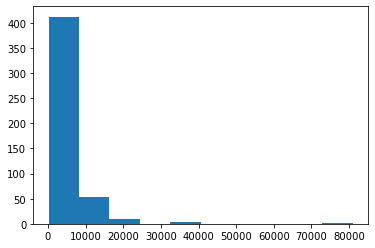

In [148]:
plt.hist(loan_df["ApplicantIncome"])

(array([ 42., 194., 153.,  49.,  22.,   8.,   3.,   3.,   3.,   3.]),
 array([  9. ,  68.1, 127.2, 186.3, 245.4, 304.5, 363.6, 422.7, 481.8,
        540.9, 600. ]),
 <BarContainer object of 10 artists>)

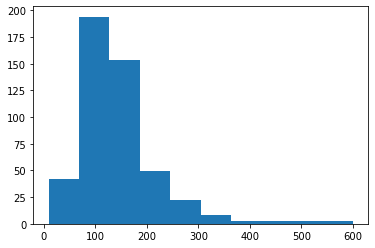

In [149]:
plt.hist(loan_df["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

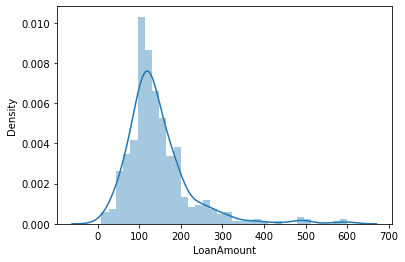

In [150]:
sns.distplot(loan_df.LoanAmount)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

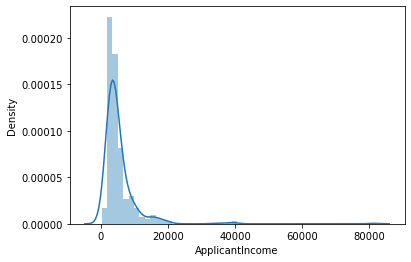

In [151]:
sns.distplot(loan_df["ApplicantIncome"])

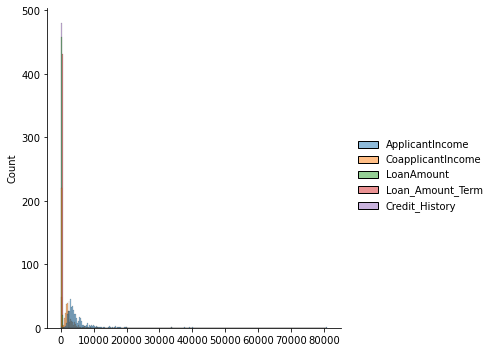

In [152]:
sns.displot(loan_df)

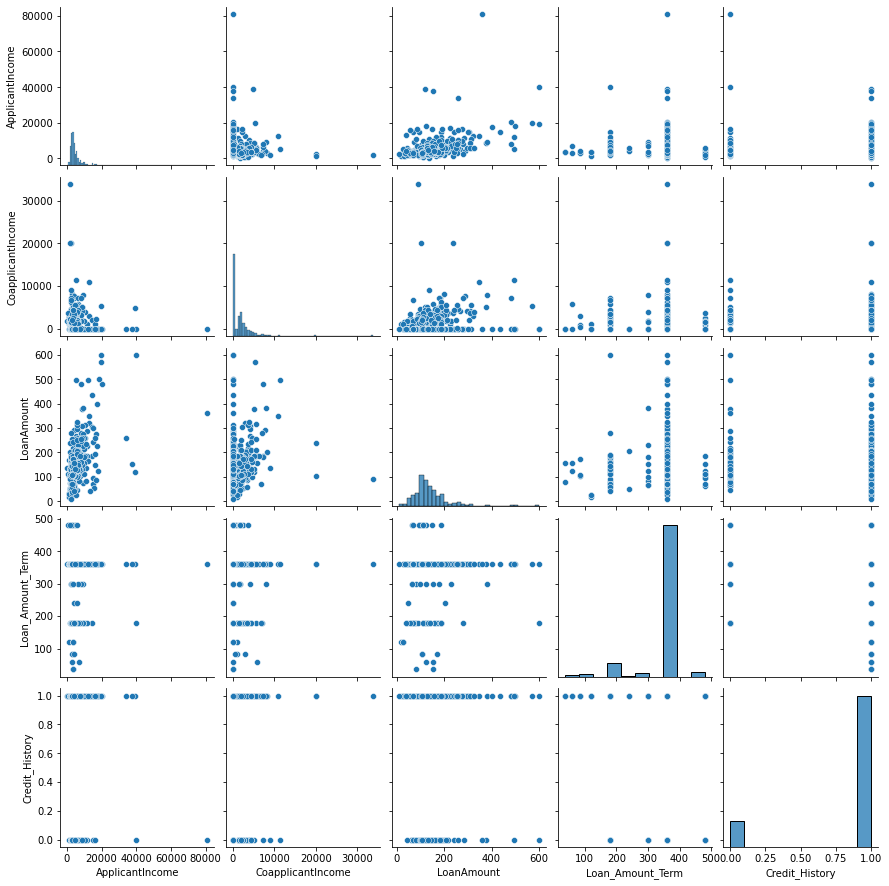

In [153]:
sns.pairplot(loan_df)

In [154]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

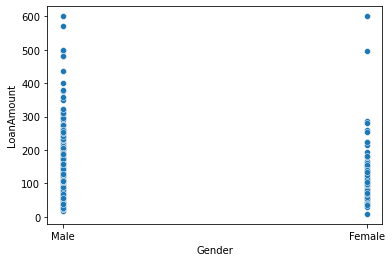

In [155]:
sns.scatterplot(loan_df.Gender,loan_df.LoanAmount)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

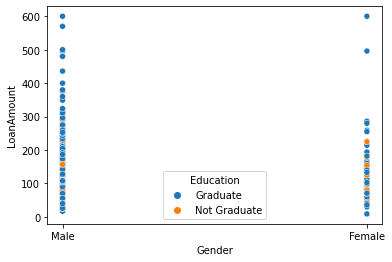

In [156]:
sns.scatterplot(loan_df.Gender,loan_df.LoanAmount,loan_df.Education)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

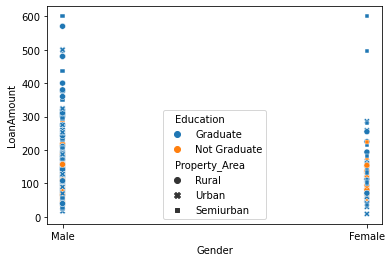

In [157]:
sns.scatterplot(loan_df.Gender,loan_df.LoanAmount,loan_df.Education,loan_df.Property_Area)

<AxesSubplot:xlabel='LoanAmount', ylabel='Property_Area'>

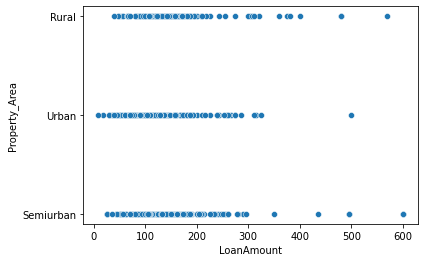

In [158]:
sns.scatterplot(loan_df.LoanAmount,loan_df.Property_Area)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

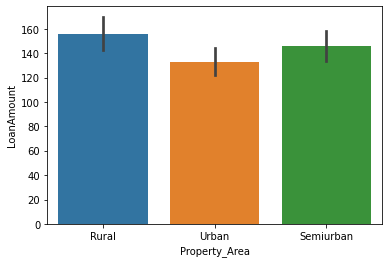

In [159]:
sns.barplot(loan_df.Property_Area,loan_df.LoanAmount)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

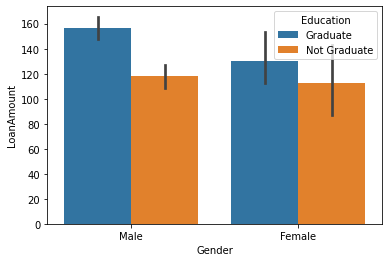

In [160]:
sns.barplot(loan_df.Gender,loan_df.LoanAmount,loan_df.Education)

In [161]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [165]:
# Label Encodeing
loan_df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [166]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [167]:
loan_df["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [168]:
loan_df=loan_df.replace({"Dependents":{"3+":4}})

In [169]:
loan_df["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [170]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


<AxesSubplot:xlabel='Education', ylabel='count'>

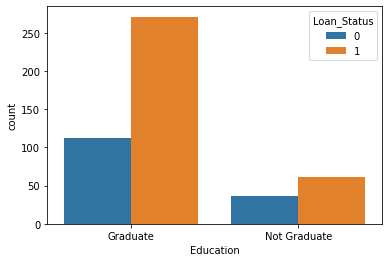

In [171]:
# Education and loan status
sns.countplot(x="Education",hue="Loan_Status",data=loan_df)

<AxesSubplot:xlabel='Married', ylabel='count'>

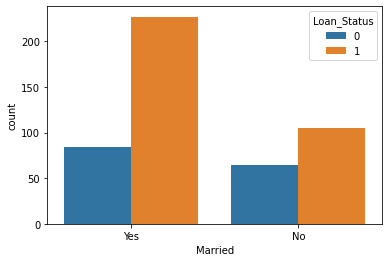

In [172]:
# Martial status and loan status
sns.countplot(x="Married",hue="Loan_Status",data=loan_df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

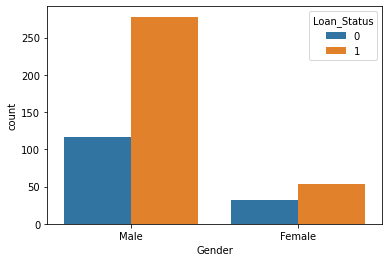

In [173]:
# Gender and loan status
sns.countplot(x="Gender",hue="Loan_Status",data=loan_df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

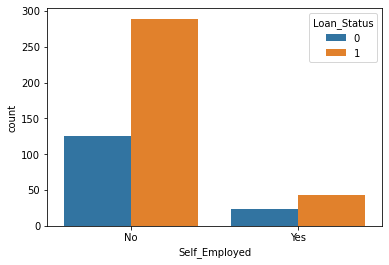

In [174]:
# Self_Employed and loan status
sns.countplot(x="Self_Employed",hue="Loan_Status",data=loan_df)

In [ ]:
# Convert Categorical value to numrical Value

In [181]:
# Label Encodeing
loan_df.replace({"Married":{"No":0,"Yes":1},
                 "Gender":{"Male":1,"Female":0},
                 "Self_Employed":{"No":0,"Yes":1},
                 "Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},
                 "Education":{"Not Graduate":0,"Graduate":1}},inplace=True)


In [176]:
loan_df["Education"].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [182]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [183]:
# Separarting Data and label

X=loan_df.drop(["Loan_ID","Loan_Status"],axis=1)
Y=loan_df["Loan_Status"]

In [185]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [186]:
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [ ]:
# Split Test and Train

In [187]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [188]:
X_train.shape

(432, 11)

In [189]:
Y_train.shape

(432,)

In [ ]:
# Training a Model

In [ ]:
# Support Vector Machine

In [190]:
from sklearn import svm

In [191]:
classifier=svm.SVC(kernel="linear")

In [192]:
# Training Model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [197]:
# Model Evaluation
X_train_pred=classifier.predict(X_train)
training_accuracy=metrics.accuracy_score(X_train_pred,Y_train)
print("Accuracy on Training:",training_accuracy)

Accuracy on Training: 0.7986111111111112


In [198]:
# Model Evaluation
Y_pred=classifier.predict(X_test)
testing_accuracy=metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy on Testing:",testing_accuracy)

Accuracy on Testing: 0.8333333333333334


In [199]:
# Confusion Matrics
conf=metrics.confusion_matrix(Y_test,Y_pred)
print(conf)

[[ 9  6]
 [ 2 31]]


Text(51.0, 0.5, 'Actual Value')

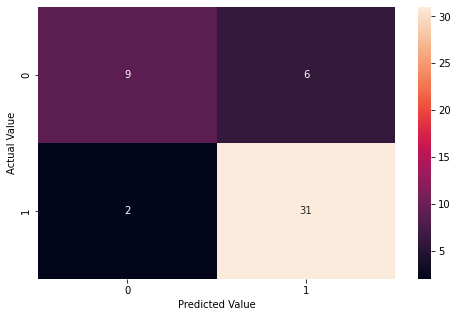

In [201]:
plt.figure(figsize=(8,5),facecolor="w")
sns.heatmap(conf,annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

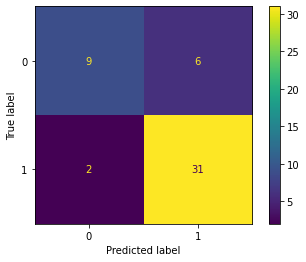

In [202]:
metrics.plot_confusion_matrix(classifier,X_test,Y_test)
plt.show()

# Precision

In [203]:
metrics.precision_score(Y_test, Y_pred)

0.8378378378378378

# Recall

In [204]:
metrics.recall_score(Y_test, Y_pred)

0.9393939393939394

# F1-Score

In [205]:
metrics.f1_score(Y_test, Y_pred)

0.8857142857142858

# classification_report


In [206]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48



In [207]:
auc=metrics.roc_auc_score(Y_test, Y_pred)
auc

0.7696969696969697

# ROC Curve

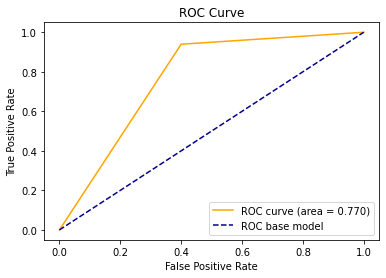

In [208]:
fpr,tpr,threhsolds=metrics.roc_curve(Y_test, Y_pred)



plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC base model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Save the model to reuse it again

In [215]:
import pickle

# open a file, where you ant to store the data
file=open("svm_classifier.pkl","wb")

# dump information to that file
pickle.dump(classifier,file)

In [ ]:
model = open('svm_classifier.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)